In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
purchase = pd.read_csv("purchase.csv")
customer = pd.read_csv("customer.csv")

**1. Revenue Analysis**

In [5]:
purchase['revenue'] = (purchase['price'] * purchase['quantity']) - purchase['discount'] + purchase['tax']

In [8]:
product_revenue = purchase.groupby('product_name')['revenue'].sum().sort_values(ascending=False)
top5_products = product_revenue.head(5)
top5_products

product_name
Curtains              24685637.93
Wall Art              24405741.42
Lighting              23896470.84
Furniture             23697514.16
Kitchen Appliances    23637961.71
Name: revenue, dtype: float64

C:\Users\TS\AppData\Local\Temp\ipykernel_25320\810867676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_products.index, y=top5_products.values, palette ='viridis')


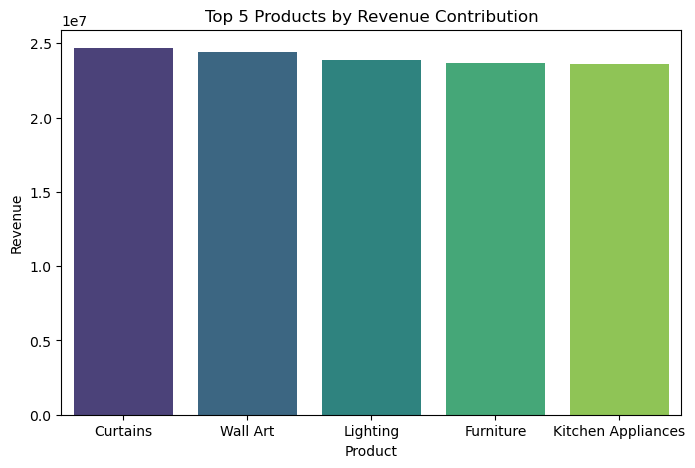

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x=top5_products.index, y=top5_products.values, palette ='viridis')
plt.title("Top 5 Products by Revenue Contribution")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

**2. Customer Segrementation**

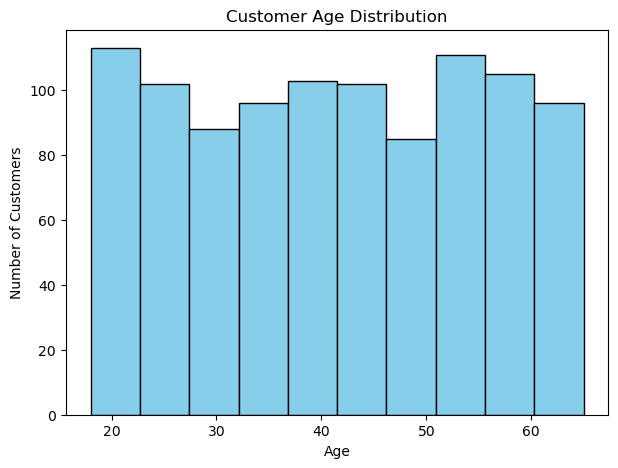

In [12]:
plt.figure(figsize=(7,5))
plt.hist(customer['age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

In [13]:
country_counts = customer['country'].value_counts()

C:\Users\TS\AppData\Local\Temp\ipykernel_25320\4221084414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')


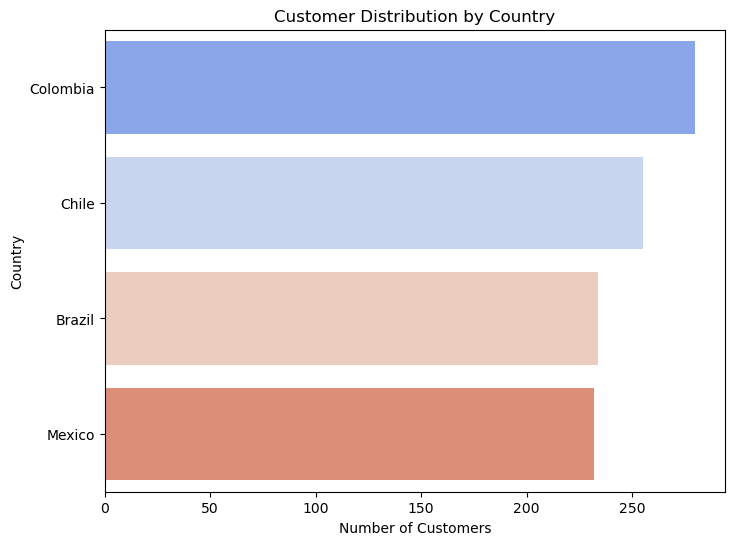

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')
plt.title("Customer Distribution by Country")
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.show()

**3. Shipping Cost Optimisation**

In [25]:
purchase['shipping_days'] = (pd.to_datetime(purchase['shipping_date']) - pd.to_datetime(purchase['order_date'])).dt.days

C:\Users\TS\AppData\Local\Temp\ipykernel_25320\3844786431.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  purchase['shipping_days'] = (pd.to_datetime(purchase['shipping_date']) - pd.to_datetime(purchase['order_date'])).dt.days
C:\Users\TS\AppData\Local\Temp\ipykernel_25320\3844786431.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  purchase['shipping_days'] = (pd.to_datetime(purchase['shipping_date']) - pd.to_datetime(purchase['order_date'])).dt.days


In [28]:
avg_shipping_cost = purchase.groupby(purchase['shipping_days'] <= 3)['shipping_cost'].mean()
print("\nAverage Shipping Cost:")
print("Within 3 Days:", avg_shipping_cost[True])
print("After 3 Days:", avg_shipping_cost[False])


Average Shipping Cost:
Within 3 Days: 27.561144983197313
After 3 Days: 27.491996960162126


**4. Gender-Based Analysis**

In [29]:
male_income = customer[customer['gender']=='Male']['income']
female_income = customer[customer['gender']=='Female']['income']
t_stat, p_val = stats.ttest_ind(male_income, female_income)


print("\nT-Test for Gender-based Income:")
print("T-statistic:", t_stat, "P-value:", p_val)


T-Test for Gender-based Income:
T-statistic: -0.2447688626238352 P-value: 0.8066856706219072


In [30]:
purchase['category'] = purchase['product_name'].str.split().str[0]
merged = purchase.merge(customer, on='customer_id')


contingency_table = pd.crosstab(merged['category'], merged['gender'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)


print("\nChi-Square Test for Product Category vs Gender:")
print("Chi2:", chi2, "P-value:", p)


Chi-Square Test for Product Category vs Gender:
Chi2: 22.592714742452966 P-value: 0.7948435792013748


**5. Correlation**

In [31]:
total_purchase = purchase.groupby('customer_id')['revenue'].sum().reset_index()
merged_income = customer.merge(total_purchase, on='customer_id')


correlation = merged_income['income'].corr(merged_income['revenue'])
print("\nCorrelation between Income and Total Purchase Cost:", correlation)


Correlation between Income and Total Purchase Cost: 0.022326049200736327


**6. Recommendations**

1. Pricing & Discounts: Focus pricing strategy on top 5 products that drive most of the revenue. Optimize discounting to avoid revenue leakage.
2. Shipping Costs: Encourage faster shipping (within 3 days) as it has lower average costs. Negotiate with logistics providers for volume discounts.
3. Customer Targeting: Target marketing campaigns by age groups and high-customer countries for maximum impact.
4. Insight from T-Test (Income by Gender): The t-test shows no significant difference in income levels between genders (p-value = 0.81). So, avoid gender-based pricing or discount strategies. Instead, design universal promotional offers that appeal to all demographics.
5. Insight from Chi-Square Test (Product Categories and Gender): The chi-square test indicates no significant association between product categories and gender (p-value = 0.79). So, focus on product performance data rather than gender-based preferences. Promote top-selling products universally to maximize sales.
6. Insight from Correlation Analysis (Income and Total Cost): The correlation between income and total cost is negligible (r = 0.003), suggesting that spending patterns are not strongly influenced by income levels. So, implement strategies to encourage higher spending per transaction, such as bundle offers, bulk purchase discounts, or free shipping thresholds.